In [1]:
# Mount the gmail account at Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#importing required packages

#modules for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting backend for matplotlib
%matplotlib inline

#setting plot style
plt.style.use('seaborn-darkgrid')

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-15b31be2ec74>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [64]:
# Loading the kaggle dataset: https://www.kaggle.com/datasets/joebeachcapital/students-performance
df = pd.read_csv('/content/drive/MyDrive/Academic Documents/Montclair State University USA/Data Mining/data.csv')
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [87]:
#considering only a few columns from the dataset
numeric_columns = ['1','3','4','17','22','29','30']
df1 = df[numeric_columns]
df1

,1,3,4,17,22,29,30
0,2,3,3,3,1,1,1
1,2,3,3,2,1,2,3
2,2,2,3,2,1,2,2
3,1,1,3,3,1,3,2
4,2,1,3,2,1,2,2
...,...,...,...,...,...,...,...
140,2,2,3,3,1,3,3
141,1,2,4,3,2,5,3
142,1,1,4,2,1,4,3
143,2,2,4,2,1,5,3


In [67]:
df1.shape

(145, 7)

**Data Summarization**

In [68]:
summary = df1.describe()
print(summary)

                1           3           4          17          22          29  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     1.620690    1.944828    3.572414    2.200000    1.241379    3.124138   
std      0.613154    0.537216    0.805750    0.917424    0.429403    1.301083   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    2.000000    3.000000    2.000000    1.000000    2.000000   
50%      2.000000    2.000000    3.000000    2.000000    1.000000    3.000000   
75%      2.000000    2.000000    4.000000    3.000000    1.000000    4.000000   
max      3.000000    3.000000    5.000000    5.000000    2.000000    5.000000   

               30  
count  145.000000  
mean     2.724138  
std      0.916536  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      4.000000  


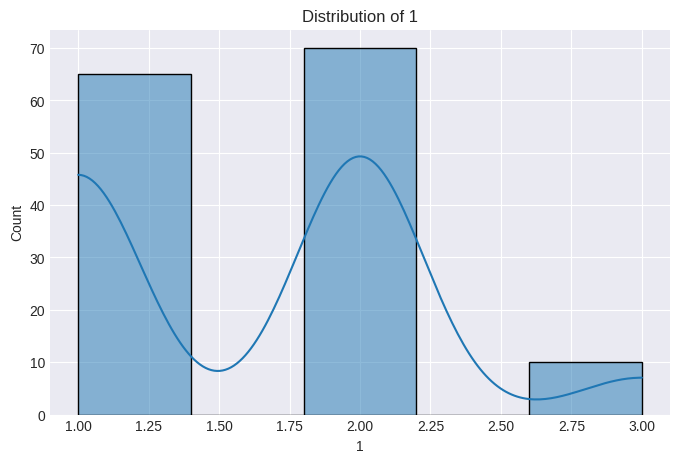

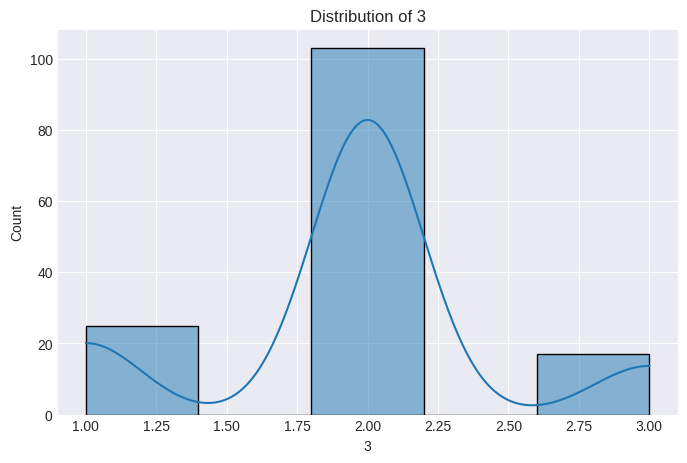

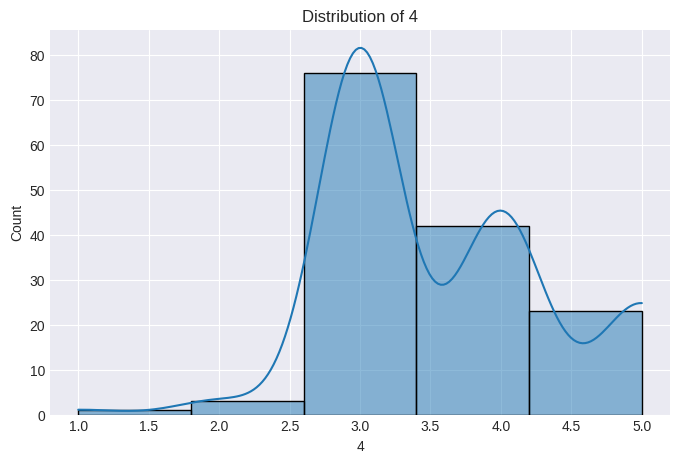

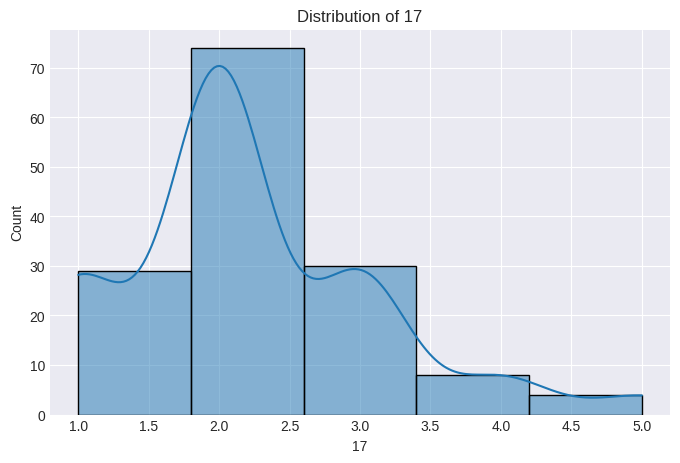

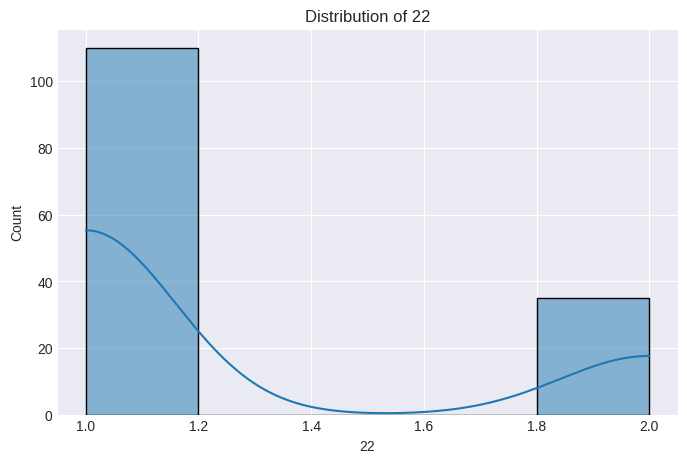

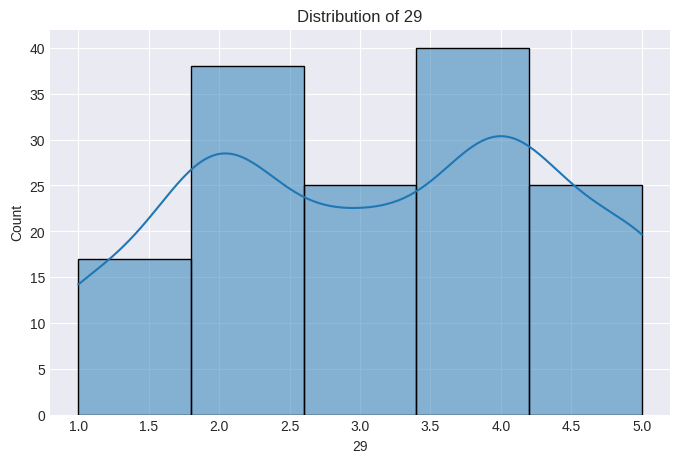

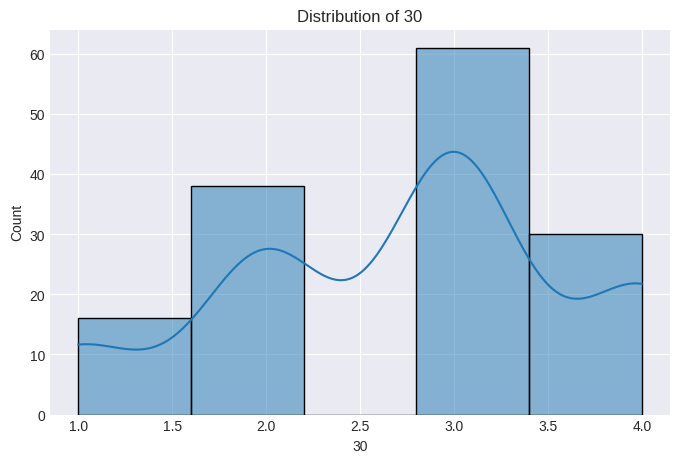

In [69]:
#Visualize the distribution of numerical variables of the specific columns using histograms
numerical_columns = ['1','3','4','17','22','29','30']
for column in numerical_columns:
  plt.figure(figsize=(8,5))
  sns.histplot(data=df1, x=column, bins=5, kde=True)
  plt.title(f'Distribution of {column}');
  plt.show()

**Data Cleaning**

In [70]:
#checking null values  #use dropna() to drop the null values from dataset
df1.isnull().sum()

1     0
3     0
4     0
17    0
22    0
29    0
30    0
dtype: int64

In [71]:
#checking duplicate values
df1.duplicated().sum()

18

In [72]:
df2 = df1.drop_duplicates()
df2

,1,3,4,17,22,29,30
0,2,3,3,3,1,1,1
1,2,3,3,2,1,2,3
2,2,2,3,2,1,2,2
3,1,1,3,3,1,3,2
4,2,1,3,2,1,2,2
...,...,...,...,...,...,...,...
139,1,2,4,1,2,1,2
141,1,2,4,3,2,5,3
142,1,1,4,2,1,4,3
143,2,2,4,2,1,5,3


In [73]:
df2.head()

,1,3,4,17,22,29,30
0,2,3,3,3,1,1,1
1,2,3,3,2,1,2,3
2,2,2,3,2,1,2,2
3,1,1,3,3,1,3,2
4,2,1,3,2,1,2,2


In [74]:
df2.tail()

,1,3,4,17,22,29,30
139,1,2,4,1,2,1,2
141,1,2,4,3,2,5,3
142,1,1,4,2,1,4,3
143,2,2,4,2,1,5,3
144,1,1,5,3,1,5,4


**Data Integration**

In [75]:
#combining two data frames

data1 = df2.head()
data2 = df2.tail()

conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,1,3,4,17,22,29,30
0,2,3,3,3,1,1,1
1,2,3,3,2,1,2,3
2,2,2,3,2,1,2,2
3,1,1,3,3,1,3,2
4,2,1,3,2,1,2,2
5,1,2,4,1,2,1,2
6,1,2,4,3,2,5,3
7,1,1,4,2,1,4,3
8,2,2,4,2,1,5,3
9,1,1,5,3,1,5,4


**Data Transformation**

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df2)

print(normalized_data) #shows normalized array

[[0.5        1.         0.5        0.5        0.         0.
  0.        ]
 [0.5        1.         0.5        0.25       0.         0.25
  0.66666667]
 [0.5        0.5        0.5        0.25       0.         0.25
  0.33333333]
 [0.         0.         0.5        0.5        0.         0.5
  0.33333333]
 [0.5        0.         0.5        0.25       0.         0.25
  0.33333333]
 [0.5        0.5        0.5        0.         0.         0.75
  1.        ]
 [0.         0.5        0.75       0.25       1.         0.75
  1.        ]
 [0.         0.5        0.5        0.         0.         0.
  0.        ]
 [0.5        1.         0.5        0.         0.         0.75
  0.66666667]
 [0.5        0.5        0.5        0.25       1.         0.
  0.33333333]
 [0.         0.         0.5        0.         1.         0.
  0.        ]
 [0.         0.         0.75       0.5        0.         0.75
  0.66666667]
 [0.         0.         0.75       0.5        0.         0.75
  0.33333333]
 [0.5        0.5     

In [80]:
#converting normalized array to pandas dataframe
normalized_df = pd.DataFrame(normalized_data, columns=df2.columns)

print(normalized_df)

       1    3     4    17   22    29        30
0    0.5  1.0  0.50  0.50  0.0  0.00  0.000000
1    0.5  1.0  0.50  0.25  0.0  0.25  0.666667
2    0.5  0.5  0.50  0.25  0.0  0.25  0.333333
3    0.0  0.0  0.50  0.50  0.0  0.50  0.333333
4    0.5  0.0  0.50  0.25  0.0  0.25  0.333333
..   ...  ...   ...   ...  ...   ...       ...
122  0.0  0.5  0.75  0.00  1.0  0.00  0.333333
123  0.0  0.5  0.75  0.50  1.0  1.00  0.666667
124  0.0  0.0  0.75  0.25  0.0  0.75  0.666667
125  0.5  0.5  0.75  0.25  0.0  1.00  0.666667
126  0.0  0.0  1.00  0.50  0.0  1.00  1.000000

[127 rows x 7 columns]


**Dimensionality Reduction**

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dim_reduced = pca.fit_transform(normalized_df)
dim_reduced = pd.DataFrame(dim_reduced, columns=["PC1", "PC2"])
dim_reduced

,PC1,PC2
0,0.204820,0.566053
1,-0.125213,0.067139
2,0.012457,0.322475
3,-0.102895,0.480663
4,0.024879,0.411721
...,...,...
122,0.912309,0.103746
123,0.336720,-0.572299
124,-0.342966,0.138068
125,-0.452784,-0.275099
